In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import random

In [2]:
chicago1 = pd.read_csv("/content/drive/MyDrive/Project_ML/Chicago_Crimes_2001_to_2004.csv", error_bad_lines=False, low_memory=False)
chicago2 = pd.read_csv("/content/drive/MyDrive/Project_ML/Chicago_Crimes_2005_to_2007.csv", error_bad_lines=False, low_memory=False)
chicago3 = pd.read_csv("/content/drive/MyDrive/Project_ML/Chicago_Crimes_2008_to_2011.csv", error_bad_lines=False, low_memory=False)
chicago4 = pd.read_csv("/content/drive/MyDrive/Project_ML/Chicago_Crimes_2012_to_2017.csv", error_bad_lines=False, low_memory=False)

b'Skipping line 1513591: expected 23 fields, saw 24\n'
b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


In [3]:
chicago = pd.concat([chicago1, chicago2, chicago3, chicago4], ignore_index = False, axis=0)
chicago.isna().sum()
chicago.Date = pd.to_datetime(chicago.Date, format='%m/%d/%Y %I:%M:%S %p')

In [4]:
chicago.shape

(7941282, 23)

In [5]:
chicago = chicago.dropna()
chicago.shape

(7145213, 23)

In [6]:
#Dropping unwanted columns as they will not give us any useful information
chicago = chicago.drop(['Unnamed: 0'], axis = 1)
chicago = chicago.drop(['ID'], axis = 1)
chicago = chicago.drop(['Case Number'], axis = 1)

In [7]:
# #Changing date format to year, month, day, hour, minute, second
# chicago['date'] = pd.to_datetime(chicago['Date'])
# chicago['Year'] = chicago['date'].dt.year
# chicago['Month'] = chicago['date'].dt.month
# chicago['Day'] = chicago['date'].dt.day
# chicago['Hour'] = chicago['date'].dt.hour
# chicago['Minute'] = chicago['date'].dt.minute
# chicago['Second'] = chicago['date'].dt.second 
# chicago = chicago.drop(['Date'], axis=1) 
# chicago = chicago.drop(['date'], axis=1) 
# chicago = chicago.drop(['Updated On'], axis=1)

In [8]:
#Converting categories to numerical values
chicago['Block'] = pd.factorize(chicago["Block"])[0]
chicago['IUCR'] = pd.factorize(chicago["IUCR"])[0]
chicago['Description'] = pd.factorize(chicago["Description"])[0]
chicago['Location Description'] = pd.factorize(chicago["Location Description"])[0]
chicago['FBI Code'] = pd.factorize(chicago["FBI Code"])[0]
chicago['Location'] = pd.factorize(chicago["Location"])[0]

In [9]:
#Grouping less number of type of crime to others from the primary type column
all_cl = chicago.groupby(['Primary Type'])['Block'].size().reset_index()
all_cl['Amt'] = all_cl['Block']
all_cl = all_cl.drop(['Block'], axis=1)
all_cl = all_cl.sort_values(['Amt'], ascending=[False])
unwanted = all_cl.tail(13)

chicago.loc[chicago['Primary Type'].isin(unwanted['Primary Type']), 'Primary Type'] = 'OTHERS'

In [10]:
Classes = chicago['Primary Type'].unique()
chicago['Primary Type'] = pd.factorize(chicago["Primary Type"])[0] 
chicago['Primary Type'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21])

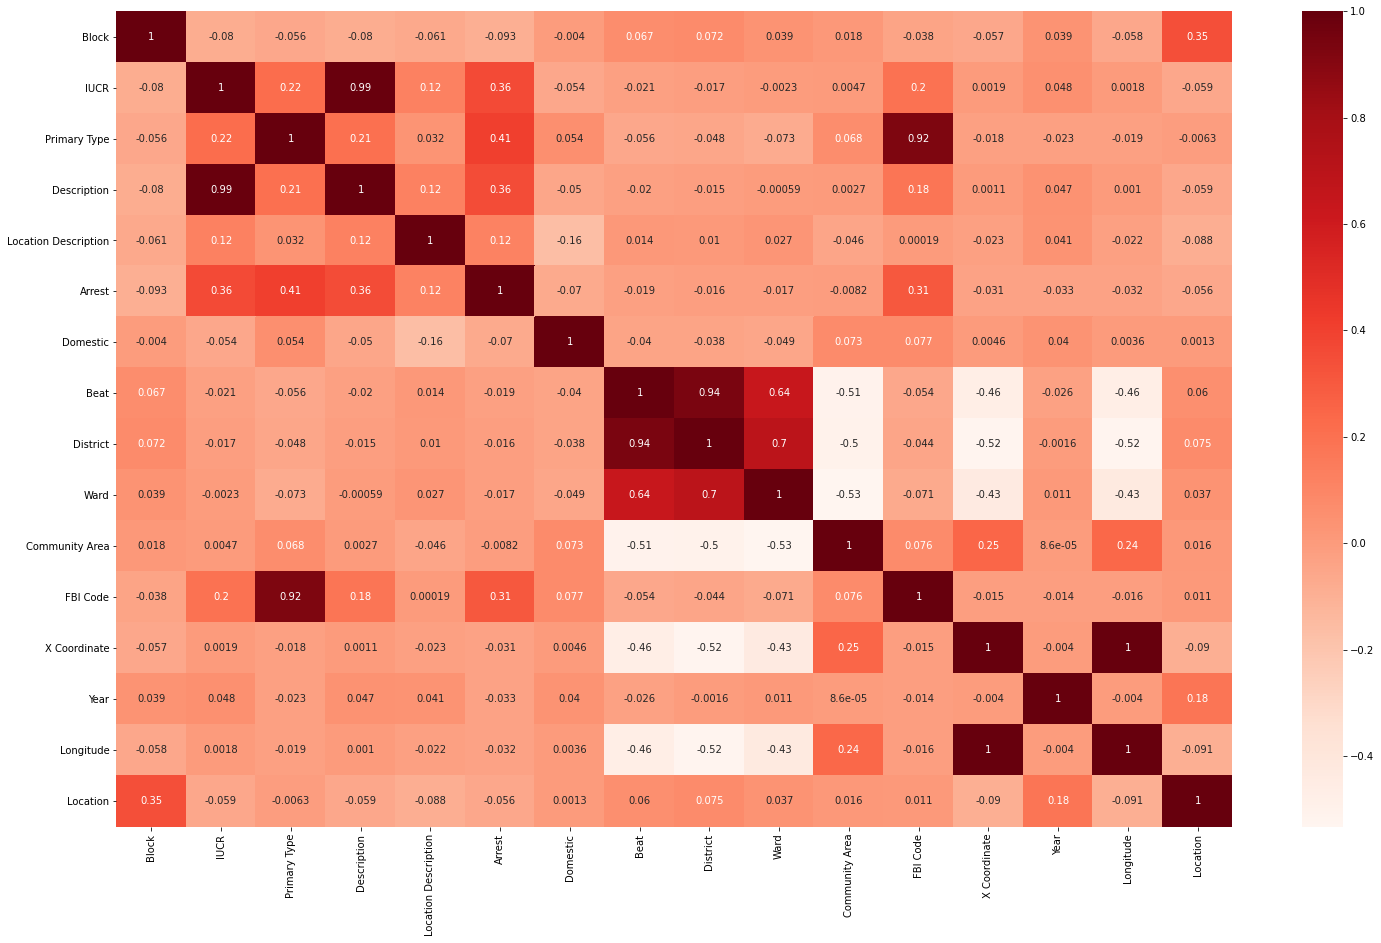

In [11]:
# Feature Selection using Filter Method 
# Split Dataframe to target class and features
X_features = chicago.drop(['Primary Type'], axis=1)
Y = chicago['Primary Type']

#Using Pearson Correlation
plt.figure(figsize=(25,15))
cor = chicago.corr()
sb.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.savefig("heat_map.jpeg")
plt.show()

In [12]:
#selecting the most relevant features

features = abs(cor['Primary Type'])
features = features[features > 0.4]
features

Primary Type    1.000000
Arrest          0.408842
FBI Code        0.923808
Name: Primary Type, dtype: float64

In [13]:
target = 'Primary Type'

In [14]:
chicago.head()

,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1,2003-03-01 00:00:00,0,0,0,0,0,False,True,935,9.0,11.0,61.0,0,1173974.0,1876757.0,2003.0,04/15/2016 08:55:02 AM,41.817229156,-87.637328,0
4,2003-05-01 01:00:00,1,1,1,1,0,False,False,2233,22.0,34.0,49.0,1,1174948.0,1831051.0,2003.0,04/15/2016 08:55:02 AM,41.691784636,-87.635116,1
6,2001-01-01 11:00:00,2,2,2,2,0,True,True,531,5.0,9.0,50.0,2,1182247.0,1829375.0,2001.0,08/29/2006 03:46:28 AM,41.687020002,-87.608445,2
7,2003-03-15 00:00:00,3,3,0,3,1,False,False,2222,22.0,21.0,73.0,0,1169911.0,1844832.0,2003.0,04/15/2016 08:55:02 AM,41.729712374,-87.653159,3
9,2003-01-01 00:00:00,4,4,1,4,0,False,False,1134,11.0,24.0,29.0,1,1154521.0,1895755.0,2003.0,04/15/2016 08:55:02 AM,41.869772159,-87.708180,4


In [15]:
X = chicago.copy()
X.drop(['Primary Type'], axis=1)

,Date,Block,IUCR,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1,2003-03-01 00:00:00,0,0,0,0,False,True,935,9.0,11.0,61.0,0,1173974.0,1876757.0,2003.0,04/15/2016 08:55:02 AM,41.817229156,-87.637328,0
4,2003-05-01 01:00:00,1,1,1,0,False,False,2233,22.0,34.0,49.0,1,1174948.0,1831051.0,2003.0,04/15/2016 08:55:02 AM,41.691784636,-87.635116,1
6,2001-01-01 11:00:00,2,2,2,0,True,True,531,5.0,9.0,50.0,2,1182247.0,1829375.0,2001.0,08/29/2006 03:46:28 AM,41.687020002,-87.608445,2
7,2003-03-15 00:00:00,3,3,3,1,False,False,2222,22.0,21.0,73.0,0,1169911.0,1844832.0,2003.0,04/15/2016 08:55:02 AM,41.729712374,-87.653159,3
9,2003-01-01 00:00:00,4,4,4,0,False,False,1134,11.0,24.0,29.0,1,1154521.0,1895755.0,2003.0,04/15/2016 08:55:02 AM,41.869772159,-87.708180,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456709,2016-05-03 23:33:00,5846,43,43,2,True,True,1034,10.0,28.0,30.0,12,1159105.0,1.8883e+06,2016.0,05/10/2016 03:56:50 PM,41.8492,-87.691556,82133
1456710,2016-05-03 23:30:00,21042,52,51,2,True,True,731,7.0,17.0,69.0,9,1175230.0,1.85618e+06,2016.0,05/10/2016 03:56:50 PM,41.7607,-87.633335,285712
1456711,2016-05-03 00:15:00,10893,53,20,39,False,False,825,8.0,15.0,66.0,17,1161027.0,1.86281e+06,2016.0,05/10/2016 03:56:50 PM,41.7792,-87.685207,46290
1456712,2016-05-03 21:07:00,1027,43,43,39,False,True,423,4.0,7.0,46.0,12,1197261.0,1.85073e+06,2016.0,05/10/2016 03:56:50 PM,41.7453,-87.552773,13456


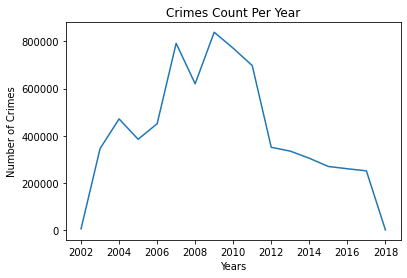

In [16]:
#Counting crimes number vs year
chicago.index = pd.DatetimeIndex(chicago.Date)
plt.plot(chicago.resample('Y').size())
plt.title('Crimes Count Per Year')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')
plt.savefig('Crime_count_yearwise.jpeg')
plt.show()

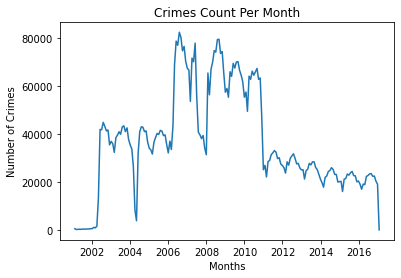

In [17]:
plt.plot(chicago.resample('M').size())
plt.title('Crimes Count Per Month')
plt.xlabel('Months')
plt.ylabel('Number of Crimes')
plt.savefig('Crime_count_monthwise.jpeg')
plt.show()

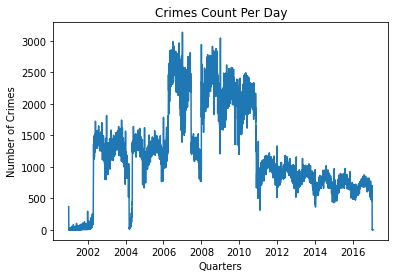

In [18]:
plt.plot(chicago.resample('D').size())
plt.title('Crimes Count Per Day')
plt.xlabel('Quarters')
plt.ylabel('Number of Crimes')
plt.savefig('Crime_count_daywise.jpeg')
plt.show()

In [19]:
from fbprophet import Prophet
chicago_predictions_daywise= chicago.resample('D').size().reset_index()

In [20]:
chicago_predictions_daywise

,Date,0
0,2001-01-01,369
1,2001-01-02,12
2,2001-01-03,6
3,2001-01-04,0
4,2001-01-05,9
...,...,...
5857,2017-01-14,3
5858,2017-01-15,2
5859,2017-01-16,3
5860,2017-01-17,1


In [21]:
chicago_predictions_daywise.columns = ['Date', 'Number of Crimes']

In [22]:
final_prediction = pd.DataFrame(chicago_predictions_daywise)
final_prediction = final_prediction.rename(columns = {'Date':'ds', 'Number of Crimes': 'y'})
prophet = Prophet(changepoint_prior_scale=0.5, seasonality_mode='multiplicative')
prophet.fit(final_prediction)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [23]:
future_prediction = prophet.make_future_dataframe(periods=3650)  #periods = no. of days for prediction
forecast = prophet.predict(future_prediction)

In [24]:
# %matplotlib inline
# plt.rcParams['figure.figsize'] = 25,20

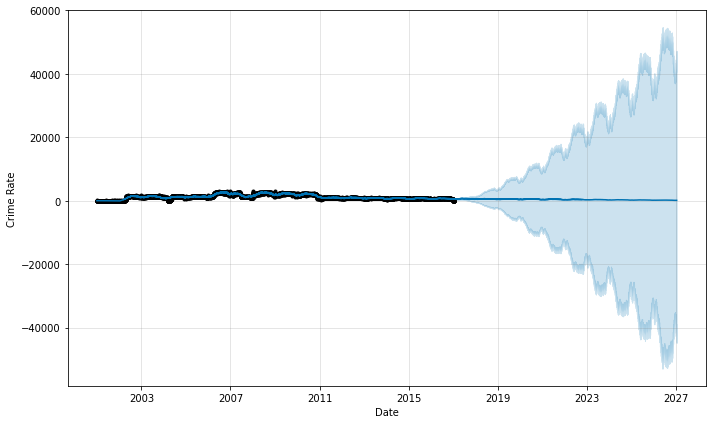

In [25]:
graph = prophet.plot(forecast, xlabel='Date', ylabel='Crime Rate')


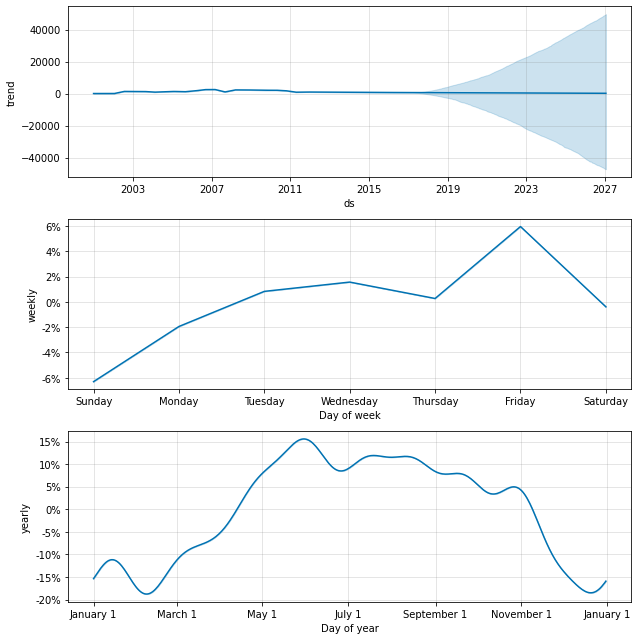

In [26]:
figure_graph = prophet.plot_components(forecast)

In [27]:
#predicting the crime rate month wise for next 10 years
chicago_predictions_monthwise= chicago.resample('M').size().reset_index()
chicago_predictions_monthwise.columns = ['Date', 'Number of Crimes']
final_prediction_m = pd.DataFrame(chicago_predictions_monthwise)
final_prediction_m = final_prediction_m.rename(columns = {'Date':'ds', 'Number of Crimes': 'y'})
prophet = Prophet(changepoint_prior_scale=0.5, seasonality_mode='multiplicative')
prophet.fit(final_prediction_m)
future_prediction_m = prophet.make_future_dataframe(periods=3650)  #periods = no. of days for prediction
forecast_m = prophet.predict(future_prediction_m)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


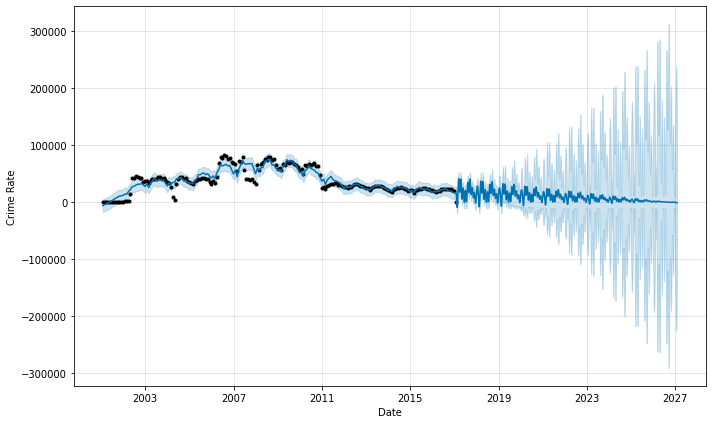

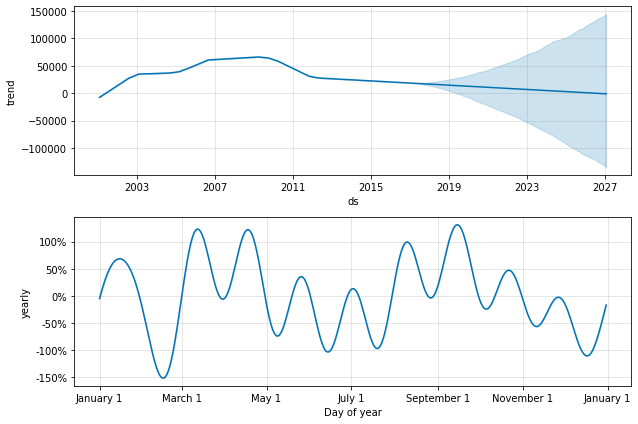

In [28]:
graph = prophet.plot(forecast_m, xlabel='Date', ylabel='Crime Rate')
figure_graph_m = prophet.plot_components(forecast_m)

In [29]:
#predicting the crime rate year wise for next 10 years
chicago_predictions_yearwise= chicago.resample('Y').size().reset_index()
chicago_predictions_yearwise.columns = ['Date', 'Number of Crimes']
final_prediction_y = pd.DataFrame(chicago_predictions_yearwise)
final_prediction_y = final_prediction_y.rename(columns = {'Date':'ds', 'Number of Crimes': 'y'})
prophet = Prophet(changepoint_prior_scale=0.5, seasonality_mode='multiplicative')
prophet.fit(final_prediction_y)
future_prediction_y = prophet.make_future_dataframe(periods=3650)  #periods = no. of days for prediction
forecast_y = prophet.predict(future_prediction_y)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 12.


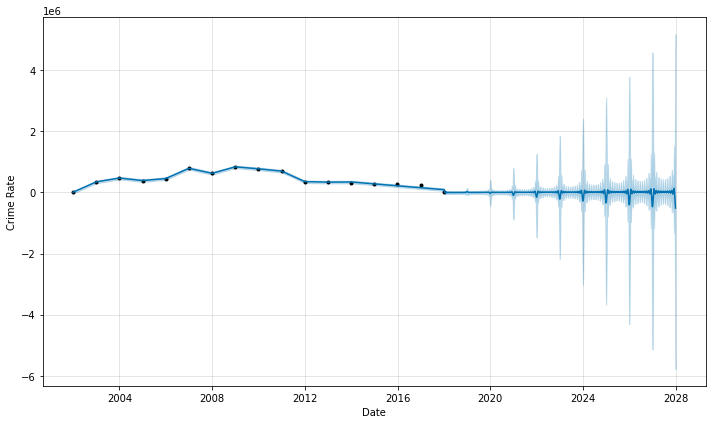

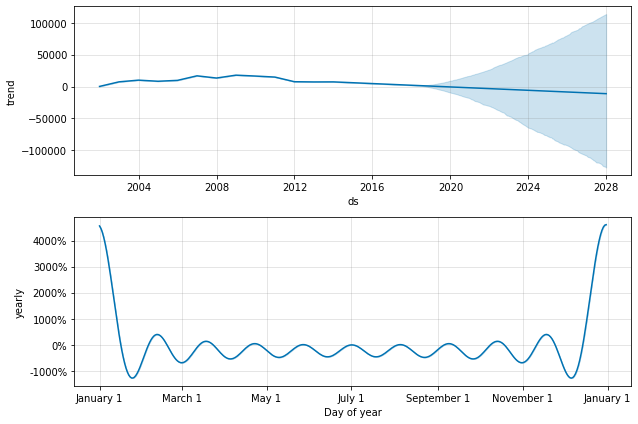

In [30]:
graph = prophet.plot(forecast_y, xlabel='Date', ylabel='Crime Rate')
figure_graph_y = prophet.plot_components(forecast_y)